<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/100_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 100: Detect Credit Card Defaulters - Decision Tree II

### Teacher-Student Activities

In the previous lesson, you learn  to build a decision tree classification model using the `sklearn` Python module and create an actual decision tree. In this lesson, you learn how a decision tree is created under the hood. You will also create a decision tree without using the `sklearn` module.

Let's quickly go through the activities covered in the previous lesson and begin this lesson from the **Decision Tree Algorithm - Introduction** section.

---

#### Detect Credit Card Defaulters - Problem Statement

The Taiwanese bank has issued credit cards to many of its clients. They have maintained a dataset of credit card `DEFAULTERS` for a period from April 2005 to September 2005.

You need to build a **Decision Tree** model to predict whether or not the client will pay the credit card bill for the next month.

Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. This can improve the customer screening process and also helps in assessing the credibility of the customer. It also helps banks in reducing the spending limit of the credit card holder or initiate legal steps for amount recovery.

**Dataset Description**

The dataset contains 30,000 rows and 25 columns. Each column represents an attribute of the customer as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|ID|ID of each customer, which has been masked to display serial number to hide confidential customer information (Integer)|
|2|LIMIT_BAL|Amount of given credit in NT dollars (including supplementary credit cards) (Float)|
|3|SEX|Gender (1=male, 2=female) (Integer)|
|4|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) (Integer)|
|5|MARRIAGE|Marital status (1=married, 2=single, 3=others) (Integer)|
|6|AGE|Customer age in years (Integer)|
|7|PAY_0|Repayment status in September, 2005 (-1=paid on time, 1=payment delay for one month, 2=payment delay for two months, … , 8=payment delay for eight months and above) (Integer)|
|8|PAY_2|Repayment status in August, 2005 (scale same as above) (Integer)|
|9|PAY_3|Repayment status in July, 2005 (scale same as above) (Integer)|
|10|PAY_4|Repayment status in June, 2005 (scale same as above) (Integer)|
|11|PAY_5|Repayment status in May, 2005 (scale same as above) (Integer)|
|12|PAY_6|Repayment status in April, 2005 (scale same as above) (Integer)|
|13|BILL_AMT1|Amount of bill statement in September, 2005 (NT dollar) (Float)|
|14|BILL_AMT2|Amount of bill statement in August, 2005 (NT dollar) (Float)|
|15|BILL_AMT3|Amount of bill statement in July, 2005 (NT dollar) (Float)|
|16|BILL_AMT4|Amount of bill statement in June, 2005 (NT dollar) (Float)|
|17|BILL_AMT5|Amount of bill statement in May, 2005 (NT dollar) (Float)|
|18|BILL_AMT6|Amount of bill statement in April, 2005 (NT dollar) (Float)|
|19|PAY_AMT1|Amount of previous payment in September, 2005 (NT dollar) (Float)|
|20|PAY_AMT2|Amount of previous payment in August, 2005 (NT dollar) (Float)|
|21|PAY_AMT3|Amount of previous payment in July, 2005 (NT dollar) (Float)|
|22|PAY_AMT4|Amount of previous payment in June, 2005 (NT dollar) (Float)|
|23|PAY_AMT5|Amount of previous payment in May, 2005 (NT dollar) (Float)|
|24|PAY_AMT6|Amount of previous payment in April, 2005 (NT dollar) (Float)|
|25|default.payment.next.month|Default payment (1=yes, 0=no) (Integer)|

<br>

This dataset consists of the following key features:
- The payment status for 6 previous bill cycles.
- The outstanding bill amount and the repayment status along with the amount paid.
- The demographic information of the customers.

The target column of this dataset is `default.payment.next.month` which classifies the customer into two categories:
- `1` (yes) - Means the customer is not going to pay for the next month's bill and hence will be termed as a **defaulter**.
- `0` (no) - Means the customer will pay the bill for the next month and will be termed as a **non-defaulter**.


Some ideas for exploration:
1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?


**Dataset source:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**Citation:**  Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

---

#### Importing Modules & Reading Data

Here is the link to the dataset:
https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv

In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cc_client_csv = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv'
df = pd.read_csv(cc_client_csv)

# Print the first five records
print(df.head(), "\n" + "-" * 100)

# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
print(df.info(), "\n" + "-" * 100)

# Rename 'PAY_0' to 'PAY_1', and 'default.payment.next.month' to 'DEFAULT'.
df.rename(columns = {"PAY_0": "PAY_1"}, inplace = True)
df.rename(columns = {"default.payment.next.month": "DEFAULT"}, inplace = True)

# Check whether the names of the two columns are changed or not.
for i in range(df.shape[1]):
  print(f"At index {i:02}, {df.columns[i]}")
print("-" * 100)

   ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns] 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                 

#### Data Analysis


In [ ]:
# Get the counts of defaulters and non-defaulters to see whether the former are in large numbers or the latter.
print("Count of defaulters and non-defaulters.")
print(df['DEFAULT'].value_counts(), "\n" + "-" * 100)

# Get the percentage of defaulters and non-defaulters.
print("Percentage of defaulters and non-defaulters.")
print(df['DEFAULT'].value_counts(normalize = True), "\n" + "-" * 100) # The 'normalize = True' returns the counts as fractions of the total.

# Calculate the number of male and female clients out of all the defaulters.
grp_gender_df = df[['ID', 'SEX', 'DEFAULT']].groupby(by = ['DEFAULT', 'SEX']).count()
print("The number of male and female clients out of all the defaulters.")
print(grp_gender_df, "\n" + "-" * 100)

# Out of all the defaulters, calculate the number of credit card clients having different education qualifications.
grp_edu_df = df[['ID', 'EDUCATION', 'DEFAULT']].groupby(by = ['DEFAULT', 'EDUCATION']).count()
print("The number of credit card clients having different education qualifications out of the total defaulters.")
print(grp_edu_df, "\n" + "-" * 100)

Count of defaulters and non-defaulters.
0    23364
1     6636
Name: DEFAULT, dtype: int64 
----------------------------------------------------------------------------------------------------
Percentage of defaulters and non-defaulters.
0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64 
----------------------------------------------------------------------------------------------------
The number of male and female clients out of all the defaulters.
                ID
DEFAULT SEX       
0       1     9015
        2    14349
1       1     2873
        2     3763 
----------------------------------------------------------------------------------------------------
The number of credit card clients having different education qualifications out of the total defaulters.
                      ID
DEFAULT EDUCATION       
0       0             14
        1           8549
        2          10700
        3           3680
        4            116
        5            262
        6            

Observations:

- Out of 30,000 credit card clients, 23,364 pay on time (non-defaulters) and the remaining 6,636 clients don't pay on time (defaulters). Let's get the percentage of defaulters and non-defaulters.

- Only about **22%** of the credit card clients of Taiwanese Bank **fail to pay their credit card bills on time.**

- Out of 6636 defaulters, 2873 were `1`-male and 3763 were `2`-female.

- Out of 6636 defaulters, majorly

  - 3330 were university graduates

  - 2036 were graduate school graduates

  - 1237 were high school graduates

  The reason for the higher number of defaulters being university school graduates could be that most of the credit clients are university graduates. Let's validate this suspicion by calculating the counts of different categorical values in the `'EDUCATION'` column.


In [ ]:
# Calculate the counts of different categorical values in the 'EDUCATION' column.
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As you can see, our suspicion is correct because most of the credit clients are university graduates followed by graduate school graduates followed by high school graduates.

Here, we observe that in the education column we have some redundant information. From the dataset description we have:

 * `1` - graduate school
 * `2` - university
 * `3` - high school
 * `4` - others
 * `5` - unknown
 * `6` - unknown

This clearly indicates that we can merge labels `5` and `6` to reduce the number of categories for education and replace the number of unwanted values in the column. Label `4` denotes that a client has some other form of education which could be either vocational training, certificate, diploma etc.

It will help us in reducing the complexity of the resulting decision tree and reduce the computational time as well.

In [ ]:
# Remove redundancy in the 'EDUCATION' column.
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 5
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 5

# Calculate the count of all the labels again in the 'EDUCATION' column.
print(df['EDUCATION'].value_counts(), "\n" + "-" * 100)

# Calculate the number of clients based on the marriage status out of all the defaulters.
grp_gender_df = df[['ID', 'MARRIAGE', 'DEFAULT']].groupby(by = ['DEFAULT', 'MARRIAGE']).count()
print(grp_gender_df, "\n" + "-" * 100)

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64 
----------------------------------------------------------------------------------------------------
                     ID
DEFAULT MARRIAGE       
0       0            49
        1         10453
        2         12623
        3           239
1       0             5
        1          3206
        2          3341
        3            84 
----------------------------------------------------------------------------------------------------


Here, we observe that in the education column we have some redundant information. From the dataset description we have:

 * `1` - married
 * `2` - single
 * `3` - others

This dataset has an extra parameter `0` in the marriage column. That may arise due to some error or when the customer is not willing to provide the information. We can merge the label `0` with `3` to reduce the number of categories for marriage and replace the number of unwanted values in the column.

In [ ]:
# Remove redundancy in the 'EDUCATION' column.
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

# Calculate the count of all the labels again in the 'EDUCATION' column.
print(df['MARRIAGE'].value_counts(), "\n" + "-" * 100)

# Out of all the defaulters, calculate the number of credit card clients having different education qualifications.
grp_marriage_df = df[['ID', 'MARRIAGE', 'DEFAULT']].groupby(by = ['DEFAULT', 'MARRIAGE']).count()
print("The number of credit card clients having different education qualifications out of all the defaulters.")
print(grp_marriage_df, "\n" + "-" * 100)

# Calculate the mean and median age of defaulters and non-defaulters.
grp_age_df = df[['AGE', 'DEFAULT']].groupby(by = 'DEFAULT').agg(func = ['mean', 'std', 'median'])
print("The mean and median age of defaulters and non-defaulters.")
print(grp_age_df, "\n" + "-" * 100)

# Calculate the mean and median 'LIMIT_BAL' of defaulters and non-defaulters.
grp_limit_bal_df = df[['LIMIT_BAL', 'DEFAULT']].groupby(by = 'DEFAULT').agg(func = ['mean', 'std', 'median'])
print("The mean and median 'LIMIT_BAL' of defaulters and non-defaulters.")
print(grp_limit_bal_df, "\n" + "-" * 100)

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64 
----------------------------------------------------------------------------------------------------
The number of credit card clients having different education qualifications out of all the defaulters.
                     ID
DEFAULT MARRIAGE       
0       1         10453
        2         12623
        3           288
1       1          3206
        2          3341
        3            89 
----------------------------------------------------------------------------------------------------
The mean and median age of defaulters and non-defaulters.
               AGE                 
              mean       std median
DEFAULT                            
0        35.417266  9.077355     34
1        35.725738  9.693438     34 
----------------------------------------------------------------------------------------------------
The mean and median 'LIMIT_BAL' of defaulters and non-defaulters.
             LIMIT_BAL           

Observations:

- Among defaulters, both single and married credit card clients are nearly the same in number.

- Both the defaulters and non-defaulters have the same median and approximately the same mean age.

- The mean and median credit card limits of defaulters were lower compared to the limit of non-defaulters. This suggests that the repayment capacity of defaulters was lesser and hence they were given a lower credit limit.

---

#### Pivot Tables


In [ ]:
# Display the median value of the columns containing continuous numeric values and group them by 'DEFAULT' and 'AGE' columns.
pivot_table1 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'SEX'], aggfunc = 'median')
pivot_table1

AGE  BILL_AMT1  BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
DEFAULT SEX                             ...                              
0       1     35    25742.0    23827.0  ...    1600.0    1600.0    1501.0
        2     33    21368.0    20344.0  ...    1838.0    1868.0    1853.0
1       1     36    20139.0    20114.0  ...    1000.0    1000.0     960.0
        2     33    20226.0    20503.0  ...    1000.0    1000.0    1001.0

[4 rows x 14 columns]

From the pivot table, we can understand the distribution of the defaulters and non-defaulters with respect to the `gender` of the customer. We observe that:
* Among defaulters, female clients have less median age when compared with male clients.
* The `LIMIT_BAL` for defaulters is less for male clients when compared with female clients.

In [ ]:
# Display the median value of the columns containing continuous numeric values and group them by 'DEFAULT' and 'MARRIAGE' columns.
pivot_table2 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'MARRIAGE'], aggfunc = 'median')
pivot_table2

AGE  BILL_AMT1  BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
DEFAULT MARRIAGE                             ...                              
0       1          39    22573.0    21022.0  ...    1877.0    1876.0    1800.0
        2          30    23469.0    22382.0  ...    1680.0    1707.0    1681.0
        3          42    21953.5    20432.0  ...    1062.5    1000.0    1000.0
1       1          40    21633.5    21190.5  ...    1000.0    1000.0    1000.0
        2          29    19438.0    19844.0  ...    1000.0    1000.0    1000.0
        3          44    18126.0    18459.0  ...    1000.0    1000.0     800.0

[6 rows x 14 columns]

From the pivot table, we can understand the distribution of the defaulters and non-defaulters with respect to the `marriage` status of the customer. We observe that:
* Married people with `age` around 40 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Singles with `age` around 29 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Customers who have not specified their marriage status with `age` around 44 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.

In [ ]:
# Display the median value of the columns containing continuous numeric values and group them by 'DEFAULT' and 'EDUCATION' columns.
pivot_table3 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'EDUCATION'], aggfunc = 'median')
pivot_table3

AGE  BILL_AMT1  BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
DEFAULT EDUCATION                             ...                              
0       1           32    14712.0    14244.0  ...    2000.0    2000.0    2000.0
        2           34    28084.5    27057.0  ...    1700.0    1700.0    1600.0
        3           40    27220.5    25402.5  ...    1396.5    1446.0    1304.0
        4           32    10734.5     8872.5  ...    1908.5    1399.5    1786.0
        5           35    42407.0    36011.0  ...    1842.0    1500.0    1610.0
1       1           33    10797.5    11730.5  ...     929.5    1000.0     902.0
        2           33    25344.0    24653.0  ...    1000.0    1009.5    1000.0
        3           41    21508.0    21410.0  ...    1000.0    1000.0    1000.0
        4           29     5374.0    12360.0  ...     326.0     390.0     780.0
        5           41    73699.5    67973.5  ...    1868.5    1295.5    1167.5

[10 rows x 14 columns]

From the pivot table, we can understand the distribution of the defaulters and non-defaulters with respect to the `education` status of the customer. We observe that clients having lower approved `LIMIT_BAL` are more likely to default irrespective of their educational background.


---

#### Subplots



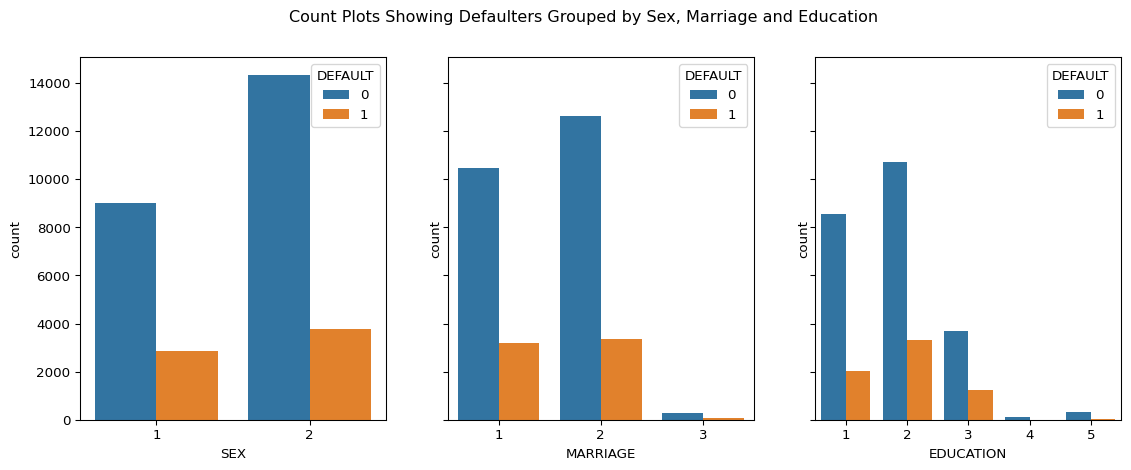

In [ ]:
# Create count plots showing defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
fig1, axis1 = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5), dpi = 96, sharey = True)
sns.countplot(x = 'SEX', data = df, hue = 'DEFAULT', ax = axis1[0])
sns.countplot(x = 'MARRIAGE', data = df, hue = 'DEFAULT', ax = axis1[1])
sns.countplot(x = 'EDUCATION', data = df, hue = 'DEFAULT', ax = axis1[2])
fig1.suptitle('Count Plots Showing Defaulters Grouped by Sex, Marriage and Education')
plt.show()

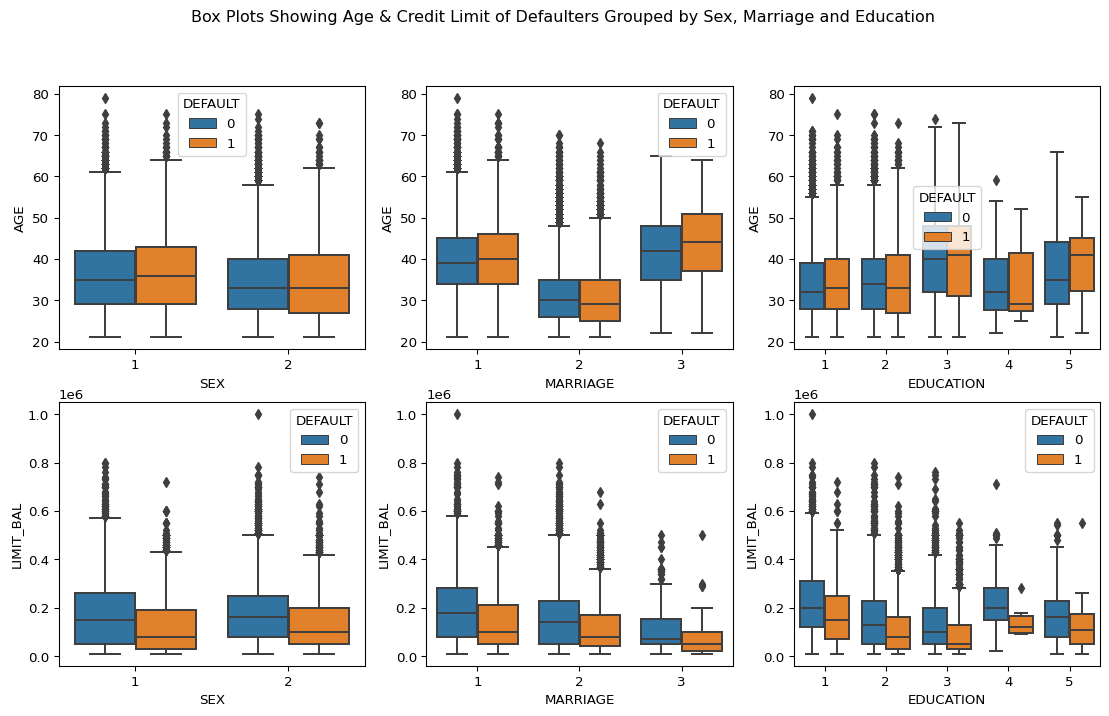

In [ ]:
# Create box plots displaying the age and credit limit of defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
fig2, axis2 = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)
sns.boxplot(x = 'SEX', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 0])
sns.boxplot(x = 'MARRIAGE', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 1])
sns.boxplot(x = 'EDUCATION', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 2])
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 0])
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 1])
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 2])
fig2.suptitle('Box Plots Showing Age & Credit Limit of Defaulters Grouped by Sex, Marriage and Education')
plt.show()

---

#### Correlation Analysis



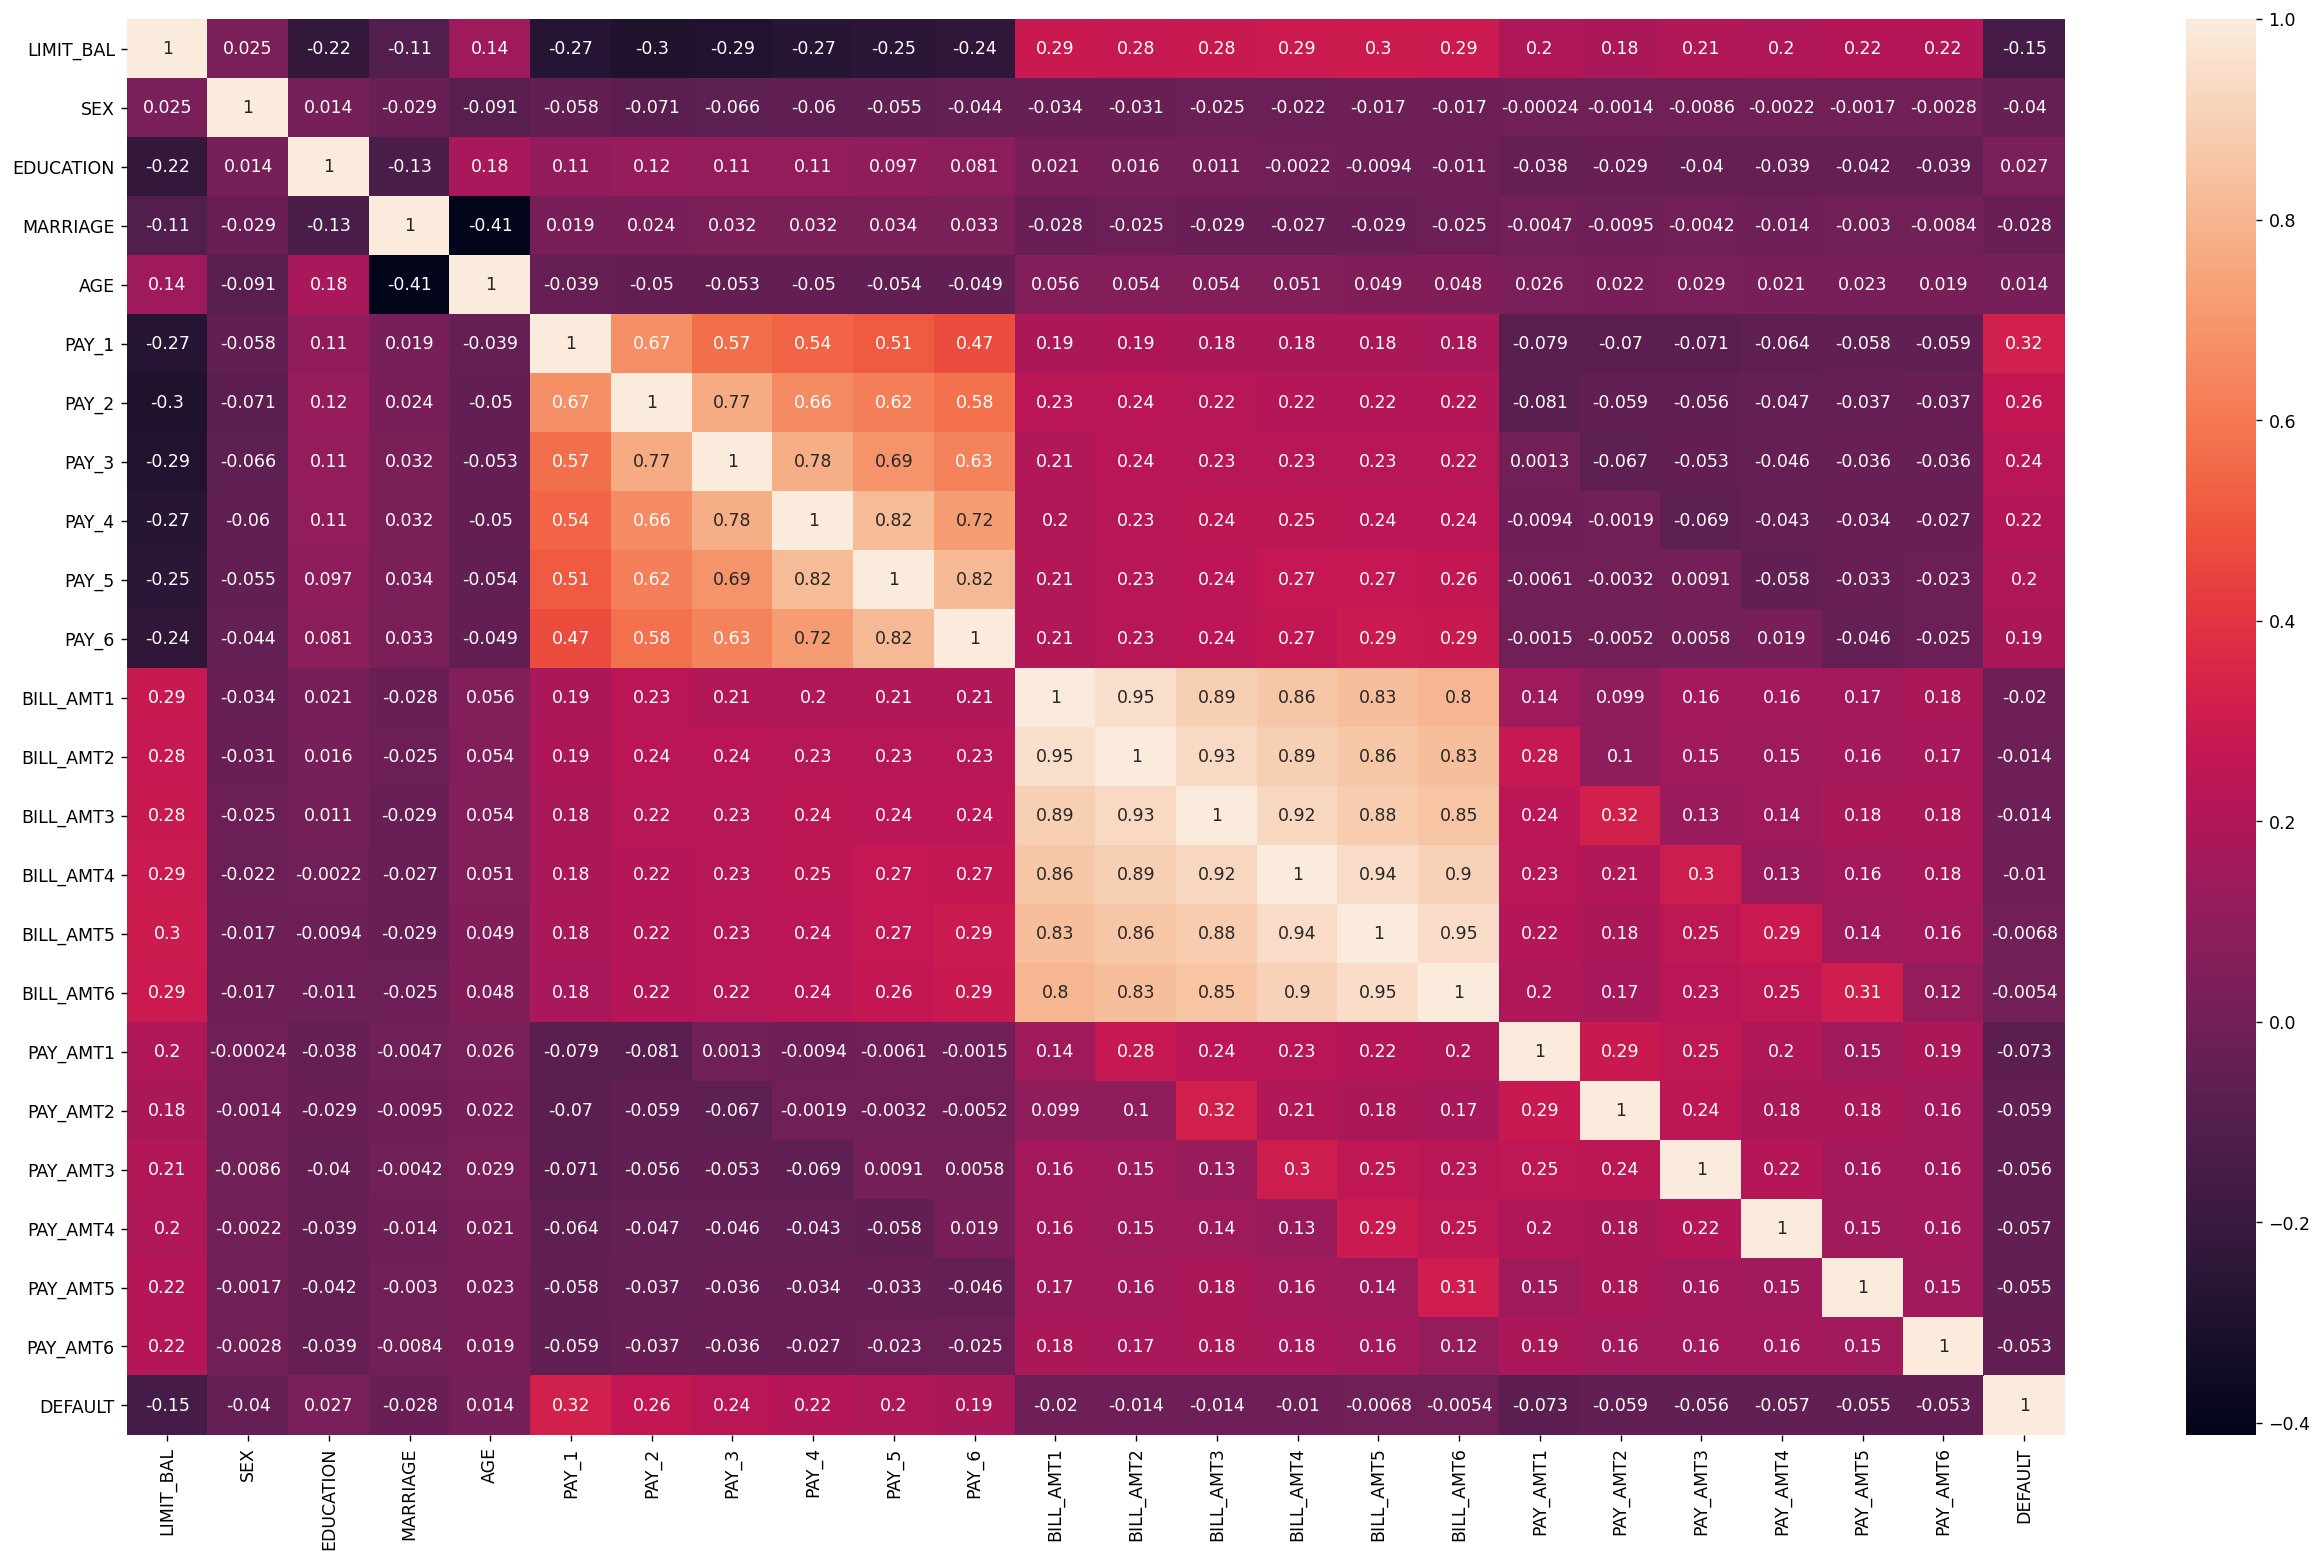

In [ ]:
# Create a correlation heatmap.
corr_df = df.iloc[:, 1:].corr()
plt.figure(figsize = (25, 15), dpi = 125)
sns.heatmap(corr_df, annot = True)
plt.show()

From the correlation heatmap, we can clearly see that the `PAY_1` to `PAY_6` (repayment status) features have the greatest influence on the customer being a defaulter amongst all other features. Moreover, the `BILL_AMT1` to `BILL_AMT6` features have the greatest influence over the repayment status, which in turn are highly dependent on `LIMIT_BAL`.

We can expect the decision tree model to be influenced by these 13 features.

---

#### Decision Tree Classifier Design

So far we have clearly observed and understood that the prediction of credit card defaulter simply put is to identify the customer into two class labels: **Yes** or **No**

Hence, this is a case of 'binary classification' where we have 2 possible outcomes and have to identify in which category the customer belongs based on their past records. Let us build a **decision tree** classifier.

A **decision tree** is a flowchart-like tree structure consisting of multiple nodes as shown below.

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example.png">

The above below represents a simple decision-making process when you feel hungry and decide what to eat.

Suppose you are studying in the evening until you feel hungry. Then you ask yourself whether you are feeling hungry?

- If the answer is no, then you continue with your work.

- Else you ask yourself another question: "Is it past 7:30 PM?".

  - If the answer is yes, then you take a salad.

  - Else you ask yourself another question: "Have you done your workout today?"
    
    - If the answer is yes, then you order a pizza and reward yourself for your workout.

    - Else you choose to eat something healthy to avoid that stubborn tummy.

Bingo, you have made a very decision tree.

In general, a decision tree consists of three types of nodes:

1. **Root Node:** The very top node is called a `root node` or just a Node. Alternatively, it is also called the top decision node. It represents the entire population or sample, and this further gets divided into two or more homogeneous sets.

2. **Decision Node:** When a sub-node splits into further sub-nodes, then it is called a `decision node`. These are also called `internal nodes` or at times just  Node(s). Internal nodes have arrows pointing to them, and they have arrows pointing away from them.

3. **Leaf or Terminal Node:** Nodes with no children (no further split) are called leaf or terminal nodes or just leaves. Leaf nodes have arrows pointing to them, but there are no arrows pointing away from them.

A general example of a decision tree:

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example-2.png">


This flowchart-like structure helps you in decision-making. Its visualisation is like a flowchart diagram that mimics human-level thinking. That is why decision trees are easy to understand and interpret. Each node in a tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case.

This process is recursive and is repeated for every subtree rooted at the new nodes.

Now that we have got a brief introduction of a decision tree, let's build one to predict credit card defaulters using the `sklearn` module.

1. Import the following modules:

  ```python
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier    
  from sklearn import tree
  from sklearn import metrics
  from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
  ```

  Where,
  - `DecisionTreeClassifier` class contains the methods and attributes to build a decision tree.

  - `tree` allows us to plot a decision tree

  - `metrics` allows us to retrieve information about nodes in a tree and the depth of a tree.

2. Split the DataFrame into train and test sets.

3. Create an object (say `dtree_clf`) of the `DecisionTreeClassifier()` constructor.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `dtree_clf`.

6. Get the accuracy score on both train and test sets by calling the `accuracy_score()` function on the `metrics` object.



In [ ]:
# Create the feature and target dataset for training and testing the model.

# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
# The 'plot_confusion_matrix' function allows us to plot a confusion_matrix heatmap in one go.

feature_columns = list(df.columns)
feature_columns.remove('DEFAULT')
feature_columns.remove('ID')

X = df[feature_columns]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Modeling a decision tree.
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Accuracy on the train set: 0.9995

Accuracy on the test set: 0.7261


Let's also plot a confusion matrix for the train set by using the `plot_confusion_matrix()` function of the `sklearn.metrics` module. Its syntax is:

> `plot_confusion_matrix(estimator, X, y_true, values_format)`

Where,

- **`estimator`:** is the object of the classifier used. In this case, `dtree_clf`.

- **`X`:** is the features set.

- **`y_true`:** is a set of actual target values.

- **`values_format`:** specifies the format for a set of values to be displayed in a confusion matrix. If set to `None`, the format specification is either `'d'` or `'.2g'` whichever is shorter. However, we will set `'d`' as an input parameter to avoid displaying the values in scientific notation.

You can read more about the `plot_confusion_matrix()` function from the link provided below:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

Let's also print the classification report for the train set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16300
           1       1.00      1.00      1.00      4700

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



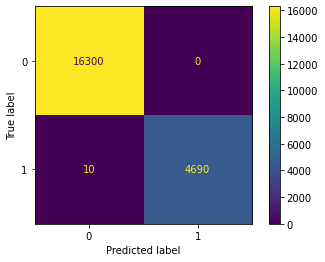

In [ ]:
# Plot a confusion matrix and print a classification report for the train set.
plot_confusion_matrix(dtree_clf, X_train, y_train, values_format = 'd')
print(classification_report(y_train, y_train_pred))

The f1-scores are 1 and the number of misclassified values is 10. This means the decision tree classifier predicts the target values accurately for the train set.

Now let's see how well it performs on the test set because that's what matters the most.

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7064
           1       0.38      0.43      0.40      1936

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000



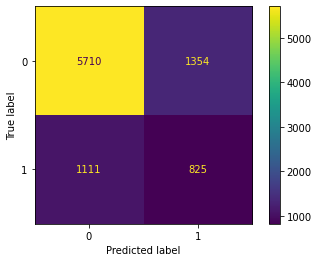

In [ ]:
# Plot a confusion matrix and print a classification report for the test set.
plot_confusion_matrix(dtree_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_pred))

The decision tree classifier is able to identify most of the `0` labels correctly, which results in a good f1-score of 0.82. However, it incorrectly classified more than 1000 instances of label `1` as label `0` which is why its f1-score is 0.41 (very poor).

The total number of misclassified values = $1346 + 1092 = 2438$ which is a lot.

The practical implications of this misclassification are that the Taiwanese bank:

- Will issue credit cards to 1092 potential defaulters who will fail to pay back to the bank. This will cause a huge loss to the bank.

- And, will NOT issue the credit cards to 1346 non-defaulters who have the capacity to pay back to the bank. Thus losing out on a profit-making opportunity.

Hence, we need to fine-tune our decision tree-based prediction model to ensure that the Taiwanese Bank doesn't make any losses and doesn't miss the opportunity to make profits.

But before that, first, let us visualise the tree and understand how the decision tree algorithm works, after which we will be in a better position to look under the surface of the model and refine the model to achieve better scores.


---

#### Plot Decision Tree

The next step is to create an actual decision tree for the decision tree classifier we have built so far. This is done with the help of the `graphviz` and `sklearn.tree` Python modules.

The `sklearn.tree` makes a decision tree in the DOT format. DOT is a graph description language. DOT graphs are typically files with the filename extension as `.gv` or `.dot`.

Here is an example of a DOT file:

```dot
digraph graphname {
    a -> b -> c;
    b -> d;
}
```

The resulting tree structure of the above DOT file is

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example-3.png">

**Image credits:** *https://en.wikipedia.org/wiki/DOT_(graph_description_language)*

**Plotting a decision tree:** To plot a decision tree.

1. Import the following Python modules:

  ```python
  from sklearn.tree import export_graphviz
  from io import StringIO
  from IPython.display import Image  
  import pydotplus
  ```

2. Create an object of the `StringIO` class and store it in a variable, say `dot_data`. The `io.StringIO` module implements a file-like class, `StringIO`, that reads and writes a string buffer (also known as memory files). Basically, it will create an empty dot file.

3. Use the `export_graphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format. This function generates a `GraphViz` representation of the decision tree, which is then written into `out_file`. We will write the contents of the `out_file` to the empty dot file created above. Inside the function, pass the following inputs:

  - **`decision_tree`:** The decision tree to be exported to `GraphViz`. In this case, `dtree_clf`.

  - **`out_file`:** The handle or name of the output file. In this case, `dot_date`. If set to `None`, the result is returned as a string.

  - **`max_depth`:** It can be used to control the depth of the tree for display scaling purposes. If set to `None`, the tree is fully generated.
  
  - **`feature_names`:** It is used to label the corresponding feature names in the decision tree. If set to `None`, generic names will be used.
  
  -  **`class_names`:** Using `class_names` we can choose to display the names of target class at the *leaf nodes* in ascending numerical order. If `True`, shows a symbolic representation of the class name.

  - **`filled`:** The appearance of a decision tree can be customised using this parameter.
  
  - **`rounded`:** It is used to draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.

  You can read more about the `export_graphviz()` function from the link provided below:

  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

4. Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is essentially an object of the `StringIO` class. The `getvalue()` function returns the entire contents of the stream.

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a variable, say `graph`.

5. Now we have got our decision tree. Now write it to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. In this case, we will name our PNG file as `'Credit_Card_Tree.png'`.


In [ ]:
# Create an actual decision tree for the decision tree classifier you have built so far.
# Import the required modules.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(decision_tree = dtree_clf, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0', '1']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

`Tip`: Click anywhere in the tree image click anywhere to zoom in/out the tree. But still, the complete tree is hard to visualize, especially when you are new to decision trees.

To overcome this issue, let us print only a small part of the `decision tree` for better understandability. This can be done by using the `max_depth` parameter while exporting the decision tree.

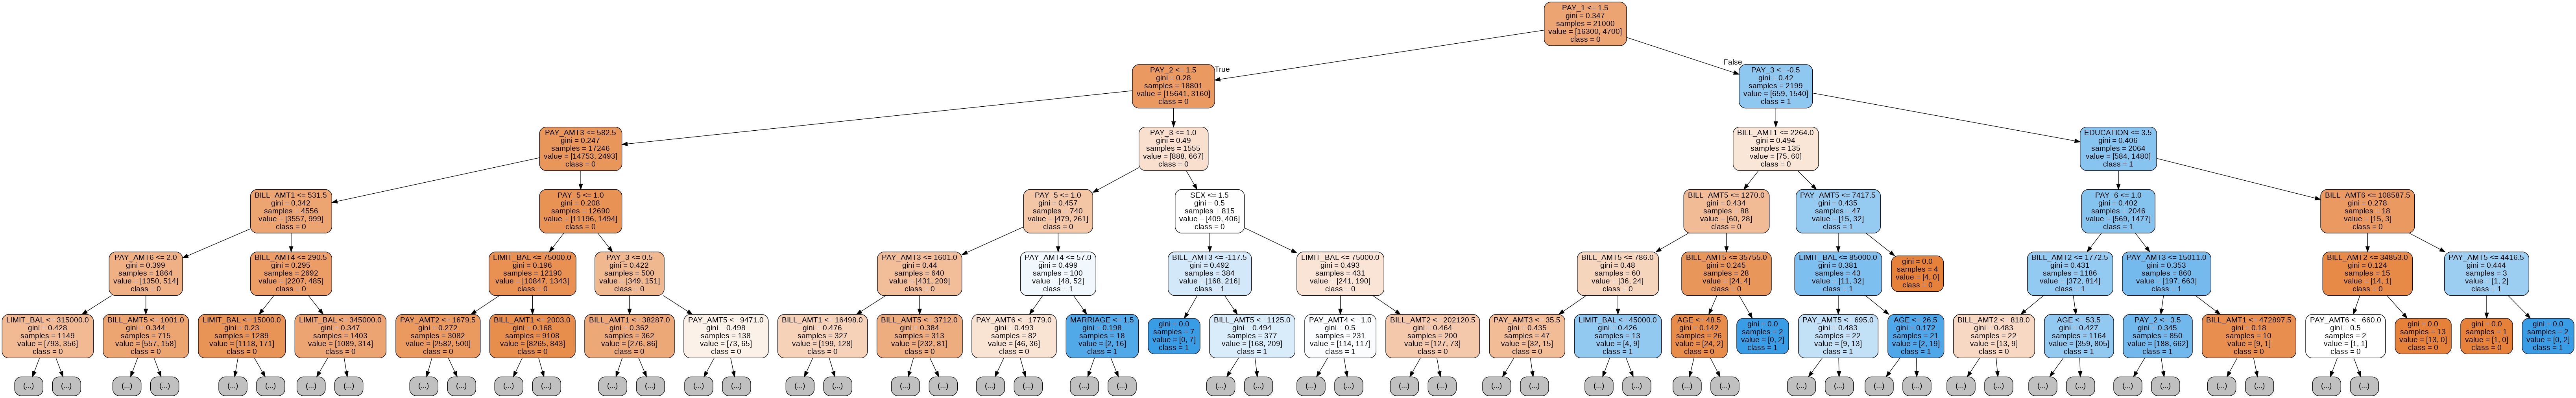

In [ ]:
# Resize the above decision tree using the 'max_depth' parameter.
dot_data = StringIO()
export_graphviz(dtree_clf, max_depth = 5, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0','1']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

`Tip`: Click anywhere in the tree image to zoom in/out of the tree. The tree structure can be downloaded as a `.png` image.


---

#### Interpret a Decision Tree

The decision tree is read in a similar way to how we interpret a flowchart.

*   The classifier model has selected `PAY_1` as the root node.

  From the dataset, we have `PAY_1` as the payment status for the current month. The numerical value in the field is read as:
  - `-1` denotes paid on time
  - `1` denotes payment delay for one month
  - `2` denotes payment delay for two months
    
      ...

  - `7` denotes payment delay for seven months
  - `8` denotes payment delay for eight months and above

*   The condition at the root node says `PAY_1 <=1.5` which means that a **customer should not have delayed the payment by one month**.

  To arrive at an outcome `decision tree` verifies the condition specified at the `respective node`. After feature comparison, the decision tree moves to the `next node`, which is connected to the current node via directional lines along with the comparison outcome marked over the line.

  As per the obtained `decision tree`:

  - If the comparison leads to `True`, then the customer payment status for `PAY_2` previous month bill cycle is verified, and the decision-making process carries further until the tree reaches the target class `label`.

  - Else if the comparison leads to `False`, then the customer payment status for `PAY_3` two months prior to the current bill cycle is verified, and similarly, the decision-making carries further until the tree reaches the target class `label`.

A snapshot of the first few nodes as per the above explanation

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/actual-decision-tree-example-1.png">

As you can see, each node in a decision tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case.

This process is recursive and is repeated for every subtree rooted at the new nodes.

---

#### Decision Tree Algorithm - Introduction

Let's look into the decision tree algorithm in detail.

When a decision tree is built, the main task is to select the **best attribute** from all the features to identify the root node and split it further. This selection of best attributes is known as the **Attribute Selection Measure (ASM)**. With the help of an ASM, we can easily select the best features for the respective nodes of a decision tree.

There exists a number of ASM techniques, but the most common are:

1. Gini Index
2. Information Gain

Let's go through them in detail one by one.

#### Gini Index

A gini index (aka gini impurity) is a measure of the impurity in a given node. Gini index measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. The Gini index varies between $0$ and $1$, where

- $0$ indicates the purity of classification (as in leaf node) and

- $1$ indicates the target elements are randomly distributed across various classes.

Mathematically, gini index is defined as:

\begin{equation}
\text{Gini Index} = 1 - \sum_{i = 1} ^{N}(p_{i})^2
\end{equation}

Where,

- $p_i$ is the probability of an object being classified to a particular class

- $N$ is the total number of samples

When we build a decision tree, we prefer **<u>splitting</u>** the nodes across that  feature that has the least gini index value at the root node.

<br>

---

**Splitting** is the process of dividing a node into two or more sub-nodes. For each split, two determinations are made:

- The feature used for the split called the splitting feature.

- The set of values for the splitting feature (which are split between the left child node and the right child node), called the split point.

The split is based on a particular criterion such as gini index and information gain (for classification) or sums of squared errors (for regression) from the entire data set. Splitting continues until a leaf node is constructed.

**Parent** and **Child Nodes:** A node that is divided into sub-nodes is called a parent node and the resulting sub-nodes are the child of a parent node.

**Leaf Nodes** - A node that cannot be divided into sub-nodes. The final nodes are called as **leaf nodes**.

![Nodes](https://s3-whjr-curriculum-uploads.whjr.online/2eed2c71-94b5-4b9e-b486-f03a680c055a.png)

---

<br>

Once we find out the root node we proceed again with gini index calculations for the sub-node(s) formed after splitting. This process is repeated continuously until we reach to all leaf node(s) for every possible split.

---

#### Decision Tree Algorithm - Gini Index Calculation

In order to better understand the steps in the formation of a decision tree using **gini index** as an attribute selection measure, consider a very small snippet from the credit card defaulter dataset:

Gender | Education | Default
--- | --- | ---
`Male` | `Unknown` | `Yes`
`Female` | `High School` | `No`
`Male` | `High School` | `No`
`Female` | `Graduate` | `Yes`
`Male` | `Graduate` | `No`

**Note:** This is a very small subset of the entire data. Hence, do not try to infer the main decision tree using this dataset. The decision tree resulting from this dataset is meant only for understanding the gini index calculation process.

Let us try to find out the decision tree for classifying the defaulter based on the 2 attributes listed in the table above.



#### Determining a Root Node

There are 2 features (Education and Gender) in the above table. This implies that we have two candidates for root nodes: (a) Gender (b) Education


**Splitting Root Node wrt Gender**

Let us first calculate the gini index for the **Gender** column.

There are 2 instances of `Female` value in the **Gender** column: one of them is a `defaulter` (represented by `Yes` or `1`) and another is a `non-defaulter` (represented by
`No` or `0`)

- So, the probability of a `Female` credit card client being a `defaulter` is $p_1 = \frac{1}{2}$

- Similarly, the probability of a `Female` credit card client being a `non-defaulter` is $p_2 = \frac{1}{2}$

Let the gini index of the `Female` value be $f$.

Therefore, the gini index of $f$ is given by

$$f = 1 - \sum_{i = 1}^{N} (p_{i})^2$$

Here, $N = 2$ because there are only two probabilities, i.e., $p_1$ and $p_2$. So, the value of $i$ also goes from $1$ to $2$.

\begin{align}
\therefore f &= 1 - \sum_{i = 1}^{N} (p_{i})^2 \\
&= 1 - ( p_1^2 + p_2^2 )
\end{align}

On substituting the values of $p_1 = \frac{1}{2}$ and $p_2 = \frac{1}{2}$ in the above equation, we get

\begin{align}
&= 1 - \left( \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right) \\
&= 1 - \frac{1}{2} \\
\Rightarrow f &= 0.5
\end{align}

Similarly, there are 3 instances of `Male` value in the **Gender** column: one of them is a `defaulter` (represented by `Yes` or `1`) and two of them are `non-defaulter` (represented by
`No` or `0`)

- So, the probability of a `Male` credit card client being a `defaulter` is $p_1 = \frac{1}{3}$

- Similarly, the probability of a `Male` credit card client being a `non-defaulter` is $p_2 = \frac{2}{3}$

Let the gini index of the `Male` value be $m$.

Therefore, the gini index of $m$ is given by

$$m = 1 - \sum_{i = 1}^{N} (p_{i})^2$$

Here, $N = 2$ because there are only two probabilities, i.e., $p_1$ and $p_2$. So, the value of $i$ also goes from $1$ to $2$.

\begin{align}
\therefore m &= 1 - \sum_{i = 1}^{N} (p_{i})^2 \\
&= 1 - ( p_1^2 + p_2^2 )
\end{align}

On substituting the values of $p_1 = \frac{1}{3}$ and $p_2 = \frac{2}{3}$ in the above equation, we get

\begin{align}
&= 1 - \left( \left(\frac{1}{3}\right)^2 + \left(\frac{2}{3}\right)^2 \right) \\
&= 1 - \frac{5}{9} \\
\Rightarrow m &= 0.444
\end{align}

**Visual Representation of Gini Index Calculation**

Here is the visual representation how calculation is being made :
![img](https://s3-whjr-curriculum-uploads.whjr.online/c0a2645d-4cc2-4564-ae0c-a04881fedae1.png)

The next step is to calculate the **weighted gini index** value for the **Gender** column in the above table.

**Weighted Gini Index (WG)**

The weighted gini index is defined as the weighted average of the gini indices of all the unique values in a column (or feature). In the case of the above table, the weighted gini index is the weighted average of the gini indices of the `Female` and `Male` values.

Mathematically, WG is defined as

$$\text{WG} = (\text{proportion of Female instances in the Gender column}) \times (\text{Gini Index of Female}) + (\text{proportion of Male instances in the Gender column}) \times (\text{Gini Index of Male})$$

In general, the WG of a column (or feature) is given as

$$\text{WG} = (\text{proportion of } \text{Value}_1 \text{ instances}) \times (\text{Gini Index of Value}_1) + (\text{proportion of } \text{Value}_2 \text{ instances}) \times (\text{Gini Index of Value}_2) + \dots + (\text{proportion of } \text{Value}_k \text{ instances}) \times (\text{Gini Index of Value}_k)$$

Where $k$ is the total number of unique values in a column (or feature).

**Note:** *Weighted Gini Index is taken as the final Gini Index value for a column*

If we split a decision tree the **Gender**, then we will get 2 nodes: `Male` and `Female`. The total number of samples in the **Gender** column is 5.

Out of 5 data points in the **Gender** column, 2 are `Female`, and 3 are `Male`.

- So, the proportion of `Female` instances = $\frac{2}{5}$

- And, the proportion of `Male` instances = $\frac{3}{5}$

Therefore, the $\text{WG}$ for the **Gender** column is

\begin{align}
\text{WG} = \left(\frac{2}{5}\right) \times 0.5 + \left(\frac{3}{5}\right) \times 0.444 = 0.4664
\end{align}

This means if we split the tree using the **Gender** feature as the root node, we get a Weighted Gini Index of $0.4664$



---

**Splitting Root Node wrt Education**

Let us now calculate the gini index for the **Education** column.

There are 2 instances of `Graduate` in the **Education** column: one of them is a `defaulter` and another is a `non-defaulter`.

- So, the probability of a `Graduate` credit card client being a `defaulter` is $p_1 = \frac{1}{2}$

- Similarly, the probability of a `Graduate` credit card client being a `non-defaulter` is $p_2 = \frac{1}{2}$

Let the gini index for `Graduate` value be $g$.

Therefore, gini index of $g$ is given by

$$g = 1 - \sum_{i = 1}^{N} (p_{i})^2$$

Here, $N = 2$ because there are only two probabilities, i.e., $p_1$ and $p_2$. So, the value of $i$ also goes from $1$ to $2$.

\begin{align}
\therefore g &= 1 - \sum_{i = 1}^{N} (p_{i})^2 \\
&= 1 - ( p_1^2 + p_2^2 )
\end{align}

On substituting the values of $p_1 = \frac{1}{2}$ and $p_2 = \frac{1}{2}$ in the above equation, we get

\begin{align}
&= 1 - \left( \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right) \\
&= 1 - \frac{1}{2} \\
\Rightarrow g &= 0.5
\end{align}

Similarly, there are 2 instances of `High School` value in the **Education** column and both are `non-defaulter`.

- So, the probability of a `High School` graduate credit card client being a `defaulter` is $p_1 = \frac{0}{2} = 0$

- Similarly, the probability of a `High School` graduate credit card client being a `non-defaulter` is $p_2 = \frac{2}{2} = 1$

Let the gini index of the `High School` value be $h$.

Therefore, gini index of $h$ is given by

$$h = 1 - \sum_{i = 1}^{N} (p_{i})^2$$

Here, $N = 2$ because there are only two probabilities, i.e., $p_1$ and $p_2$. So, the value of $i$ also goes from $1$ to $2$.

\begin{align}
\therefore h &= 1 - \sum_{i = 1}^{N} (p_{i})^2 \\
&= 1 - ( p_1^2 + p_2^2 )
\end{align}

On substituting the values of $p_1 = \frac{1}{3}$ and $p_2 = \frac{2}{3}$ in the above equation, we get

\begin{align}
&= 1 - \left( 0^2 + 1^2 \right) \\
&= 1 - 1 \\
\Rightarrow h &= 0
\end{align}

Similarly, there is 1 instance of `Unknown` value in the **Education** column and it is a `defaulter`.

So, the probability of an `Unknown` graduate credit card client being a `defaulter` is $p_1 = \frac{1}{1} = 1$

Let the gini index of the `Unknown` value be $u$.

Therefore, the gini index of $u$ is given by

$$u = 1 - \sum_{i = 1}^{N} (p_{i})^2$$

Here, $N = 1$ because there is only one probability, i.e., $p_1$. So, the value of $i$ also goes from $1$ to $1$.

\begin{align}
\therefore u &= 1 - \sum_{i = 1}^{N} (p_{i})^2 \\
&= 1 - p_1^2
\end{align}

On substituting the value of $p_1 = \frac{1}{3}$ in the above equation, we get

\begin{align}
&= 1 - \left( 0^2 + 1^2 \right) \\
&= 1 - 1 \\
\Rightarrow u &= 0
\end{align}

The next step is to calculate the **weighted gini index** value for the **Education** column.

Out of 5 data points in the **Education** column, 1 is `Unknown`, 2 are `Graduate`, and 2 are `High School`.

- So, the proportion of `Graduate` instances = $\frac{2}{5}$

- The proportion of `High School` instances = $\frac{2}{5}$

- And, the proportion of `Unknown` instances = $\frac{1}{5}$

Therefore, the $\text{WG}$ for the **Education** column is

\begin{align}
\text{WG} = \left(\frac{2}{5}\right) \times 0.5 + \left(\frac{2}{5}\right) \times 0 + \left(\frac{1}{5}\right) \times 0 = 0.2
\end{align}

This means if we split the tree using the **Education** feature as the root node, we get a Weighted Gini Index of $0.2$


*Hence, we will choose <u>Education</u> as the <u>root node</u> as it produces the lowest Gini Index value.*

The decision tree using the **Education** column as the root node can be drawn as:

<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/28222171-1e9f-4629-9610-9a82460e4ee9.png">

<br>

---

**Pure Node:** A node that has sample(s) of only 1 label is called a pure node. The splitting operation continues in a decision tree until all the sub-nodes obtained after splitting are pure nodes.

**Impure Node:** Any node that has sample(s) that are a combination of 2 or more labels is an impure node. Other than leaf nodes, all nodes of a decision tree are impure nodes.

- **Less Impure Node:** Any node that has sample(s) that are a combination of 2 or more labels but both labels have less than 50% of distributions is a less impure nodes.

- **More Impure Node:** Any node that has sample(s) that are a combination of 2 or more labels but both labels have 50% of distributions is a more impure nodes.

![](https://s3-whjr-curriculum-uploads.whjr.online/ea672cf5-23a0-4174-a5c0-e50cbdd3bde5.png)

---

<br>

After this, there is only 1 feature left i.e. **Gender** with 1 defaulter and 1 non-defaulter. The split of the **Gender** column is straightforward, hence, no need to calculate the gini for splitting the decision tree further.

**Note:** This tree is obtained from a very small subset of the entire data, hence might not look like the original decision tree made from the entire dataset.

---

#### Activity 1: Decision Tree Algorithm - Information Gain

Let's now learn another ASM technique called information gain that is meant to select the best attribute or feature to split a decision tree. However, information gain is based on the entropy of a dataset. Let us first understand the concept of entropy.


**Entropy** signifies the randomness in a dataset. It is a metric that measures impurity. A less impure node requires less information to describe it and a more impure node requires more information. Information theory is a measure to define this degree of disorganisation in a system known as entropy. If a sample is completely homogeneous (having the same type of values), then the entropy is zero and if the sample is equally divided (50—50%), it has an entropy of one. The entropy of a dataset $S$ is calculated as follows.

\begin{align}
\text{Entropy}(S) = - \sum_{i=1}^{N}p_{i} \times \log_{2}(p_{i})
\end{align}

Where $p_i$ is the probability of an object classified as a class (or label).

**Information Gain (IG)** is the measurement of changes in entropy value after the splitting/segmentation of a dataset wrt on an attribute.

IG is calculated as:

\begin{align}
\text{IG} = \text{Entropy(S)} - [\text{Weighted average of Entropy of each unique value of a feature}]
\end{align}

or simply

\begin{align}
\text{IG} = \text{Entropy}(S_{b}) - \text{Entropy}(S_{a})
\end{align}

Where,
- $S$ is a dataset
- $S_b$ is a dataset before split and $S_a$ is the dataset after the split

When we build a decision tree, we prefer splitting the nodes across the attribute/feature which has maximum information gain after splitting through the root node.

Once we find out the root node we proceed again with the gini index calculations for the sub-node(s) formed after splitting. This process is repeated continuously until we reach all the leaf node(s) for every possible split.

#### Decision Tree Algorithm - Information Gain Calculation

In order to better understand the steps for the formation of a decision tree, let us take yet another very small snippet from the credit card defaulter dataset and understand the process:

Gender | Education | Default
--- | --- | ---
`Male` | `Unknown` | `Yes`
`Male` | `High School` | `No`
`Female` | `High School` | `No`
`Male` | `Graduate` | `No`
`Female` | `Graduate` | `Yes`

**Note:**  The above table is a very small subset of the entire dataset, hence do not try to infer the main decision tree using this dataset.

Let us try to create a decision tree to identify credit card defaulters wrt Education and Gender.

#### Determining Root Node

There are two possibilities for root nodes: (a) Gender (b) Education

First, we will calculate the entropy of the above table. We know that entropy is given by

\begin{align}
\text{Entropy} = -\sum_{i=1}^{N}p_{i}\times \log_{2}(p_{i})
\end{align}

In the above table, we have 5 samples in total out of which 2 are defaulters and 3 non-defaulters.

Let $p_1$ and $p_2$ be the probability of defaulters and non-defaulters respectively.

- So, the probability of defaulters $p_1 = \frac{2}{5}$

- And, the probability of non-defaulters $p_2 = \frac{3}{5}$

Therefore, the entropy of the table $S$ before the split is given by

\begin{align}
\text{Entropy}(S_b) &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2))
\end{align}

On substituting $p_1 = \frac{2}{5}$ and $p_2 = \frac{3}{5}$ in the above equation, we get

\begin{align}
 &= - \left( \left( \frac{2}{5}\right) \times \log_{2} \left( \frac{2}{5}\right) + \left( \frac{3}{5}\right) \times \log_{2}\left(\frac{3}{5}\right) \right) \\
 &= 0.97
\end{align}

Hence, the entropy of the table (considered for IG calculation) before the split is $0.971$

You can verify this value by calculating it through Python code.

In [ ]:
# S1.1: Calculate the entropy value of the table (considered for IG calculation) before the split.


**Splitting Root Node wrt Gender**

Let us split the root node wrt the **Gender** column.

There are 3 instances of `Male` in the table. Out of them, one is a defaulter and 2 are non-defaulters.

Let $p_1$ and $p_2$ be the probabilities of `Male` defaulter(s) and `Male` non-defaulter(s) respectively.

- So, the probability of `Male` defaulters $p_1 = \frac{1}{3}$

- And, the probability of `Male` non-defaulters $p_2 = \frac{2}{3}$

Male | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $2$ |
$p_i$ | $\frac{1}{3}$ | $\frac{2}{3}$ |
$$p_i \times \log_2 (p_{i})$$ | $$\frac{1}{3} \times \log_2 \left(\frac{1}{3}\right) = -0.53$$| $$\frac{2}{3} \times \log_2 \left(\frac{2}{3}\right) = -0.39$$ |

You can verify these values by calculating them through a Python code.

In [ ]:
# S1.2: Calculate the p_i * log_2 (p_i) value(s)
#import numpy as np
#-(2/5)*np.log2(2/5)+(3/5)*np.log2(3/5)

0.08659188145522112

In [ ]:
-((2/5) * np.log2(2/5) + (3/5) * np.log2(3/5))

0.9709505944546686

Therefore, the entropy value wrt to the `Male` instances is

\begin{align}
\text{Entropy} &= - (p_{1} \times \log_{2}(p_{1}) + p_{2}\times \log_{2}(p_{2})) \\
&= - (- 0.53  - 0.39) \\
&= 0.92
\end{align}

There are 2 instances of `Female` in the table. Out of them, one is a defaulter another is a non-defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Female` defaulter(s) and `Female` non-defaulter(s) respectively.

- So, the probability of `Female` defaulters $p_1 = \frac{1}{2}$

- And, the probability of `Female` non-defaulter $p_2 = \frac{1}{2}$

Female | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $1$ |
$p_{i}$ | $0.5$ | $0.5$ |
$$p_i \times \log_2 (p_{i})$$ | $$0.5 \times \log_2 (0.5) = -0.5$$| $$0.5 \times \log_2 (0.5) = -0.5$$ |



In [ ]:
# S1.3: Calculate the p_i * log_2 (p_i) value(s)
-((1/3) * np.log2(1/3) + (2/3) * np.log2(2/3))

0.9182958340544896

Therefore, the entropy value for the `Female` instances is

\begin{align}
\text{Entropy} &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2)) \\
&= - (- 0.5 - 0.5) \\
&= 1
\end{align}

Now, let's calculate the *entropy* value after the split that *is the weighted average of the entropy values* for `Male` and `Female` instances. Its calculation process is the same as weighted gini index calculation, i.e.,

$$\text{WE} = (\text{proportion of Male instances in the Gender column}) \times (\text{Entropy of Male}) + (\text{proportion of Female instances in the Gender column}) \times (\text{Entropy of Female})$$

- The proportion of `Male` instances in the Gender column = $\frac{3}{5}$
- The proportion of `Female` instances in the Gender column = $\frac{2}{5}$

\begin{align}
\therefore \text{Entropy}(S_a) = \left(\frac{3}{5}\right)\times 0.92 + \left(\frac{2}{5}\right)\times 1 = 0.95
\end{align}

Therefore, the **Information Gain (IG)** obtained by splitting the root node wrt the Gender column is:

\begin{align}
\text{IG} &= \text{Entropy}(S_{b}) - \text{Entropy}(S_a) \\
&= 0.97 - 0.95 \\
&= 0.02
\end{align}

Hence, the information gain is $0.02$ (almost nil) if we use the root node as Gender and perform a split.

**Splitting Root Node wrt Education**

Let us split the root node wrt the **Education** column.

There is 1 instance of `Unknown` in the table and it is a defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Unknown` defaulter(s) and `Unknown` non-defaulter(s) respectively.

- So, the probability of `Unknown` defaulters $p_1 = \frac{1}{1} = 1$

- And, the probability of `Unknown` non-defaulter $p_2 = \frac{0}{1} = 0$

Unknown | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $0$ |
$p_i$ | $1$ | $0$ |
$$p_i \times \log(p_i)$$ | $$1 \times \log_2 (1) = 0$$ | $$0 \times \log_2 (0) = 0$$ |

Hence, the entropy value for the `Unknown` instances will be $0$.

There are 2 instances of `Graduate` in the table. One of them is a defaulter and another is a non-defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Graduate` defaulter(s) and `Graduate` non-defaulter(s) respectively.

- So, the probability of `Graduate` defaulters $p_1 = \frac{1}{2}$

- And, the probability of `Graduate` non-defaulter $p_2 = \frac{1}{2}$

Graduate | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $1$ |
$p_{i}$ | $0.5$ | $0.5$ |
$$p_i \times \log_2 (p_{i})$$ | $$0.5 \times \log_2 (0.5) = -0.5$$ | $$0.5 \times \log_2 (0.5) = -0.5$$ |

Therefore, the entropy value for `Graduate` instances is

\begin{align}
\text{Entropy} &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2)) \\
&= - (- 0.5 - 0.5) \\
&= 1
\end{align}

There are 2 instances of `High School` in the table. Both of them are non-defaulters.

Let $p_1$ and $p_2$ be the probabilities of `High School` defaulter(s) and `High School` non-defaulter(s) respectively.

- So, the probability of `High School` defaulters $p_1 = \frac{0}{2} = 0$

- And, the probability of `High School` non-defaulter $p_2 = \frac{2}{2} = 1$

High School | Defaulter | Non-defaulter
--- | --- | --- |
Count | $0$ | $2$ |
$p_{i}$ | $0$ | $1$ |
$$p_i \times \log_2 (p_{i})$$ | $$0 \times \log_2 (0) = 0$$| $$1 \times \log_2 (1) = 0$$ |

Therefore, the entropy value for `High School` instances is $0$

Hence, Entropy after split wrt the Education column is:
\begin{align}
\text{Entropy}(S_a) &=  \left(\frac{1}{5}\right)\times 0 + \left(\frac{2}{5}\right)\times 1 + \left(\frac{2}{5}\right)\times 0 \\
&= 0.4
\end{align}

Information Gain obtained splitting the root node wrt the Education columns is
\begin{align}
\text{IG} &= \text{Entropy}(S_b) - \text{Entropy}(S_a) \\
&= 0.97 - 0.4 \\
&= 0.57
\end{align}

Hence, the information gain is $0.57$ if we use the root node as Education and perform a split.

*Since the information gain (IG) obtained from the Education column split ($0.57$) is greater than the IG obtained from the Gender column split ($0.02$), we choose the Education column as our Root Node.*

---

#### Activity 2: Decision Tree Creation

Let us again revisit the original dataset, take a small subset of the dataset, and manually build a decision tree without using the `sklearn` module.

As we saw in the correlation matrix, defaulter status depends on few features compared to others. Let us create a smaller dataset by having only the following features to the new dataset:

`['EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']`

Also, out of 30,000 samples (or rows), let's take only 24 samples randomly from the original DataFrame. To do this, use the `sample()` function of the `pandas` module. Its **syntax** is:

> `data_frame.sample(n, random_state)`

Where `n` is the number of samples to be taken and `random_state` allows you to take the same sample randomly when set to an integer value.

In [ ]:
# S2.1: Make a new smaller DataFrame from the original DataFrame.
new_df = df[['EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']].sample(n = 24, random_state = 5)

print(f"Number of rows = {new_df.shape[0]}\nNumber of cols = {new_df.shape[1]}\n")

new_df.head()

Number of rows = 24
Number of cols = 9



,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
8033,2,1,0,0,-1,0,0,-1,0
29952,2,1,-1,-1,-1,-1,0,-1,0
2736,2,2,0,0,0,0,0,0,0
29677,2,1,0,0,-2,-2,-1,0,0
3285,1,1,0,0,0,0,2,0,0


**Algorithmic Approach**

Since we are not using the `sklearn` module to build a decision tree, we have to do the following to do the same manually:

1. Compute entropy for a dataset using the following result.

\begin{align}
\text{Entropy} = -\sum_{i=1}^{N}p_i \times \log_{2}(p_i)
\end{align}

2. For each attribute/feature:
  - Calculate entropy for all categorical values.
  - Calculate the weighted average of the entropy values for the current attribute.
  - Calculate information gain (IG) for the current attribute.

3. Choose the feature/attribute having the greatest IG value to split the root node.

4. Repeat the splitting process until we get pure nodes (all leaf nodes).

Now let's define a Python function, say `compute_entropy()`, that takes a DataFrame as an input and returns the entropy value as an output. Inside the function:

1. Get the target variable values from the new small DataFrame.

2. Declare a new variable, say `entropy` and set its value equal to 0.

3. Determine the unique values of the target variable. In our case, 0 and 1.

4. For all the unique values, calculate entropy using a `for` loop. Inside the `for` loop:

  - Calculate the probability of an event, say `i` as per the entropy formula.
  
  - Calculate the entropy values.

5. Finally, return the value of entropy.

In [ ]:
# S2.2: Create a Python function that takes a DataFrame as an input and returns entropy value as an output.
def entropy_before_split(new_df):
    target_col_name = new_df.columns[-1]
    entropy = 0
    unique_values = new_df[target_col_name].unique()
    for value in unique_values:
        probability_i = new_df[target_col_name].value_counts()[value] / len(new_df[target_col_name])
        entropy += -probability_i * np.log2(probability_i)
    return entropy

In the above code:

- `new_df.columns[-1]` will return the name of the target column.

- `new_df[target_col_name].unique()` will return an array containing unique values

- `new_df[target_col_name].value_counts()` will return a series containing the count of all the unique values contained in the `new_df[target_col_name]` series.

- `new_df[target_col_name].value_counts()[value]` will return the count at index `value` in the `new_df[target_col_name].value_counts()` series.
  
  Eg., `new_df['DEFAULT'].value_counts()` returns the following series:

  ```
  0    19
  1     5
  Name: DEFAULT, dtype: int64
  ```

  Therefore:
  - If `value = 0`, then `new_df['DEFAULT'].value_counts()[value]` will return `19`

  - Similarly, if `value = 1`, then `new_df['DEFAULT'].value_counts()[value]` will return `5`

- `entropy += -probability_i * np.log2(probability_i)` will calculate probabilities for `value = 0` and `value = 1`, multiply with their corresponding logarithm (at base 2) values and will add them to get the **entropy before split** value.

  \begin{align}
  \text{Entropy} = -\sum_{i=1}^{N}p_i \times \log_{2}(p_i)
  \end{align}


The next step is to compute **entropy after** the **split**, i.e., the entropy of a feature variable (or weighted entropy of the unique values of a feature) in the `new_df` DataFrame after splitting the root node.

For this, we need to define another function, say `entropy_after_split()`. It should take `new_df` and a feature of `new_df` as inputs and return the weighted entropy for a feature after the split. Inside the function:

1. Get the target variable from a DataFrame.

2. Determine the unique values of each feature (`'PAY_1'`, `'PAY_2'` etc.)

3. Declare a new variable, say `weighted_entropy` and set it equal to 0 initially. It will eventually store the weighted entropy value for a feature.

4. Loop through all the unique values of a feature using a `for` loop. Inside the loop:

  - Define a new variable, say `entropy_of_feat_uniq_val` and set it equal to 0 initially. It will eventually store the entropy of a unique value of a feature variable.

  - Loop through the unique values of the target variable that are available for a feature variable. Inside the inner `for` loop.

    - Calculate the probability of a unique value of a feature variable

    - Calculate the corresponding entropy by multiplying the probability value (obtained in the above step) with its logarithm (at base 2) value, i.e., $-p_i \times \log_{2}(p_i)$

  - Exit the inner `for` loop and inside the outer `for` loop, calculate the proportion of a unique value in the feature.

  - Calculate the weighted entropy value of a feature by computing the weighted average of the individual entropy values of each unique value.

5. Return the weighted entropy value.

In [ ]:
# S2.3: Create a function to calculate the entropy after split the value for a feature.
def entropy_after_split(new_df, feature):
  target_col_name = new_df.columns[-1]
  feature_unique_values = new_df[feature].unique()
  weighted_entropy = 0
  for feat_uniq_val in feature_unique_values:
      entropy_of_feat_uniq_val = 0 # To store the entropy value of a unique value of a feature variable.
      corres_avail_target_val = new_df.loc[new_df[feature] == feat_uniq_val, target_col_name].value_counts().index.values
      for val in corres_avail_target_val:
          prob_val = new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val] / new_df.shape[0]
          entropy_of_feat_uniq_val += - prob_val * np.log2(prob_val)
      prop_of_feat_uniq_val = new_df[new_df[feature] == feat_uniq_val].shape[0] / new_df.shape[0]
      weighted_entropy += prop_of_feat_uniq_val * entropy_of_feat_uniq_val
  return weighted_entropy

In the above code:

- `new_df.columns[-1]` returns the name of the target column.

- `new_df[feature].unique()` returns the unique values in a feature column.

- `new_df.loc[new_df[feature] == feat_uniq_val, target_col_name].value_counts().index.values` returns the unique values that are available for a feature. Eg., for `new_df[EDUCATION] == 1`, corresponding `DEFAULT` values are `0` only. This means in the `new_df` DataFrame there is NO `Graduate` defaulter. Hence, the available `DEFAULT` values for `new_df[EDUCATION] == 1` is only `0`. So the inner `for` loop should iterate only once.

- `new_df[new_df[feature] == feat_uniq_val]` will return a DataFrame containing only the `feat_uniq_val` in the `feature` column.

  Eg., if `feature` is `EDUCATION` and `feat_unique_val` is `3`, then `new_df[new_df[feature] == feat_uniq_val]` will return

  ```
        EDUCATION	SEX	PAY_1	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6	DEFAULT
  28568	    3	  2	    0	    0	    0	   -2	   -2	   -2	      0
  29524	    3	  1	    1	    2	    2	    2	    2	    2	      1
  ```

- `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()`will return a series containing the count of all the unique values contained in the target column in the `new_df[new_df[feature] == feat_uniq_val]` DataFrame.

  Eg., if `feature` is `EDUCATION` and `feat_unique_val` is `3`, then `new_df[new_df[feature] == feat_uniq_val]['DEFAULT].value_counts()` will return

  ```
  0    1
  1    1
  Name: DEFAULT, dtype: int64
  ```

- `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val]` will return the count at index `val` in the `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()` series.
  
  Eg., if `feature` is `EDUCATION` and `feat_unique_val` is `3`, then `new_df[new_df[feature] == feat_uniq_val]['DEFAULT].value_counts()` will return

  ```
  0    1
  1    1
  Name: DEFAULT, dtype: int64
  ```

  Therefore:
  - If `val = 0`, then `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val]` will return `1`

  - Similarly, if `value = 1`, then `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val]` will return `1`.

- `new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val] / new_df.shape[0]` will return the probability values for `val`.

- `entropy_of_feat_uniq_val += - prob_val * np.log2(prob_val)` will calculate the individual entropies of each unique value in the target variable for a unique value in a feature variable.

- `new_df[new_df[feature] == feat_uniq_val].shape[0] / new_df.shape[0]` will calculate the proportion of a unique value in a feature.

- `weighted_entropy += prop_of_feat_uniq_val * entropy_of_feat_uniq_val` will calculate the weighted entropy of a feature.

<br>


Now let's define a function to calculate the information gain (IG) to split a root node. Let's call it `root_node_attribute()` function. This function takes a DataFrame as an input and returns the node having the greatest information gain value. Inside the function:

1. Create empty lists to store entropy and information gain for respective nodes

2. Use `for` loop to obtain entropy and information gain for all the features set in DataFrame. Inside for loop:

  - Get entropy and information gain only for feature columns

  - Find the entropy after split wrt features and append to `entropies_list` using the `append()` method

  - Obtain the information gain using the formula $\text{IG} = E_b - E_a$ wrt features and append to the `info_gain_list` using the `append()` method

3. Finally, return the feature having the greatest information gain value.


In [ ]:
# S2.4: Create a function to calculate the Information Gain for split operation.
def root_node_attribute(new_df):
    entropies_list = []
    info_gain_list = []
    for feature in new_df.columns[:-1]:
        entropies_list.append(entropy_after_split(new_df, feature))
        info_gain_list.append(entropy_before_split(new_df) - entropy_after_split(new_df, feature))
    return new_df.columns[:-1][np.argmax(info_gain_list)]

In the above code:

- The `entropies_list` and `info_gain_list` represent the entropy and information gain list respectively.

- Within for loop:  

  - `entropy_after_split(new_df, feature)` function will return entropy after split with respect to various `feature`.

  - The `append()` method will append the $E_a$ values returned by the `entropy_after_split()` function to `entropies_list`.

  - `entropy_before_split(new_df) - entropy_after_split(new_df, feature)` will return information gain wrt corresponding `feature`.

  - The `append()` method will append the $IG$ values to `info_gain_list` using the `append()` method.

- `np.argmax(info_gain_list)` will return the list index which exhibit maximum value.

  In general, `np.argmax()` function returns the index of the algebraically greatest item in an array or list.
  
  Eg., for the list `[-2, 4, 7, 12, 1, .34]`, the `np.argmax()` function will return 3 because the list contains the greatest item (12) at index 3.

- `new_df.columns[:-1][np.argmax(info_gain_list)]` will return the feature name corresponding to the list index.

In [ ]:
# S2.5: Find out the attribute (or feature) to split the root node.
root_node_att = root_node_attribute(new_df)
root_node_att

'PAY_1'

What happens when use the `root_node_attribute()` function:

- `entropies_list.append(entropy_after_split(new_df, feature))` will return a list of entropies wrt to each node. Eg.:

  ```
  entopies_list =[0.730, 0.864, 0.576, 0.604, 0.586, 0.671, 0.634, 0.692]
  index:          0      1      2      3      4      5      6      7
  ```
- `info_gain_list.append(entropy_before_split(new_df) - entropy_after_split(new_df, feature))` will return a list of information gain wrt the `entropies_list`. Eg:

  ```
  info_gain_list = [0.0075, -0.1259, 0.1617, 0.1337, 0.1516, 0.0667, 0.1036, 0.0458]
  index:             0       1        2       3       4       5       6       7
  ```

- The lowest entropy is exhibited by `index = 2` element with a value of `0.576`

- Consequently, `index = 2` exhibits the highest information gain of `0.16176021330557655` which implies `index = 2` indicates the `PAY_1` feature based on the feature returned by `root_node_attribute()` function.

<br>

Let us now define a function, say `get_subtable()` to obtain the number of samples in a decision node. This function we will take:

- `new_df`, `node`, and `value` as inputs

- Return the rows having unique values of a feature

- Use the `reset_index()` method to reset the index numbering for rows returned by the `get_subtable()` function

In [ ]:
# S2.6: Select the node with the highest information gain and repeat above step for remaining features
def get_subtable(new_df, node, value):
    return new_df[new_df[node] == value].reset_index(drop = True)

In the above function:

- `new_df` is the DataFrame on which the operation is to be performed.

- `node` is returned by `root_node_attribute()` function. It gives us the feature on which split operation would be performed.

  - `PAY_1` is the root node as it exhibits maximum information gain value.

  - The root node will split into 2 cases: `True` or `False`.

- `value` will be determined from the set of attribute values for the respective node.

- `new_df[new_df[node] == value]` will return the rows in the `new_df` having all the items as `value` in the `node` column.

  For eg. `new_df[new_df['PAY_1'] == -1]` will return the rows in the `new_df` which has attribute value at feature `PAY_1` equal to $-1$

- `reset_index(drop = True)` do not try to insert index into DataFrame columns. This resets the index to the default integer index.

In [ ]:
# S2.7: Get a DataFrame from 'new_df' having only -1 values in the 'PAY_1' column and reset the index.
new_df[new_df['PAY_1'] == -1].reset_index(drop = True)

,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,1,-1,-1,-1,-1,0,-1,0
1,1,2,-1,-1,-1,-2,-1,-1,0
2,1,1,-1,-1,-1,-1,-1,-1,0
3,1,2,-1,0,0,0,0,0,0
4,2,2,-1,-1,-1,0,0,0,1


We have reset these row numbers to $0,1,2,....$ by calling the `reset_index()` method on the `new_df` object.

Let us check the response of the `get_subtable` function for `feature: PAY_1` and `value == -1`:

In [ ]:
# S2.8:: Create a new DataFrame that is a subtable of 'new_df' having only -1 values in the 'PAY_1' column and reset the index.
subtable = get_subtable(new_df, 'PAY_1', -1)
subtable

,EDUCATION,SEX,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,1,-1,-1,-1,-1,0,-1,0
1,1,2,-1,-1,-1,-2,-1,-1,0
2,1,1,-1,-1,-1,-1,-1,-1,0
3,1,2,-1,0,0,0,0,0,0
4,2,2,-1,-1,-1,0,0,0,1


If we look at the `PAY_1` column the values for each row `is equal to -1`. The rows order begin from $0, 1, 2 \dots$

<br>

It is time to put together everything we have done so far and construct the decision tree. The final step is to create a function to build the decision tree. For this, define a function `build_tree()`. It should take `new_df` DataFrame, empty `tree` as inputs and return the resulting decision tree (a Python dictionary) as an output. Inside the function:
  
1. Define the `target` variable and store the `DEFAULT` column name in it.
  
2. Declare a variable `node` and set it equal to the root node attribute returned by the `root_node_attribute()` function.

3. Declare a variable `att_value` and set it equal to the `unique` labels from the target set. This `att_value` will be used to split the decision nodes.

4. Check `if tree = None`. Inside the `if` block:

    - Create an empty dictionary `tree = {}`.

    - Assign an empty dictionary as a corresponding value to the `node` returned by `root_node_attribute()` function.

5. Use a `for` loop to iterate through each value stored in the `att_value` array. Inside the loop:

  - Declare a new variable `subtable`. Call the `subtable()` function which returns the rows of a dataset for the root `node`.

  - Declare a variable `target_labels` that stores the unique target values.

  - Declare a variable `counts` which represents the repetitions of the target having the unique `target_labels` for the respective feature.

  - To identify the node as a leaf node, check the length of `counts` returned for unique values of the target set using an `if` statement.

    - If the `len(counts) == 1` it means there is only one unique target value in the respective node. This node will become a leaf node and display the number of the target occurring in the `target_labels`.

    - Else the node becomes a decision node and splits the node further using the `build_tree()` function by passing `subtable` as an input to the function.

6. Return the `tree` dictionary.

In [ ]:
# S2.9: Create a function, say 'build_tree()' to build the decision tree.
def build_tree(new_df, tree = None):
    target = 'DEFAULT'
    node = root_node_attribute(new_df)
    att_value = np.unique(new_df[node])

    if tree is None:
        tree = {}
        tree[node] = {}

    for value in att_value:
        subtable = get_subtable(new_df, node, value)
        target_labels, counts = np.unique(subtable[target], return_counts = True)
        if len(counts) == 1:
            tree[node][value] = target_labels[0]
        else:
            tree[node][value] = build_tree(subtable)

    return tree

In the above code:

-  `new_df` is the reduced dataset we have obtained from the original credit card default dataset.

- We pass parameter `tree = None` in the function argument to provide a default value and to avoid any `TypeError` occurrence.

- Assign the `'DEFAULT'` column name to `target` variable for recursive use in the `build_tree()` function.

- `node = root_node_attribute(new_df)` will return the node with having the greatest information gain value.

  - For the first occurrence, the `node` variable will contain the root node.

  - This function will be used recursively. Hence, once we receive a decision node from `root_node_attribute()` function and if the node is impure the `build_tree(subtable)` inside the `if len(counts) == 1` will return the node with the highest information gain among the remaining nodes.

  - With each recursive call for this function inside the `if len(counts) == 1` the number of features for which $IG$ is calculated will reduce.

- `att_value = np.unique(new_df[node])` will return the list of unique values in the `node` column. Eg. for node `PAY_1` the `att_value` will be:

  ```
  array([-2, -1,  0,  1,  2,  3])
  ```

- Since `tree` is `None`, the `if tree is None` will return `True` condition. Inside the conditional block:

  - `tree = {}` creates an empty dictionary.

  - `tree[node] = {}` adds the dictionary elements with respect to `node` returned by the `root_node_attribute()` function as `key`. This is done inside the `tree` dictionary.

    Eg. for the root node we have `PAY_1`. Hence, `tree[node] = {}` will create a nested dictionary and returns:

    `{'PAY_1': {}}`

    - This indicates that we now have `PAY_1` as our root node and will be split to get the next decision nodes.
    
    - The decision nodes which will further be defined with `get_subtable()` function, will again be a dictionary and the process will continue until we reach the leaf nodes.

- `for value in att_value:` we will loop through all unique values of feature returned by `root_node_attribute()` function.

- For eg. for root node we have: `node = 'PAY_1'`. For this node the unique values in the column can be returned by: `np.unique(new_df['PAY_1'])`. This returns a list: for `att_value`

  `[-2 -1  0  1  2  3]`

- In the `for` loop, we will iterate through different values of the `att_value` list:

  - `subtable = get_subtable(new_df, node, value)` will return the rows for unique `value` obtained from `att_value`. Eg. for a random unique value of say `PAY_1 = 2` the subtable will return:

    ```
        EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
    0       2    1      2      2      7      7      7      7        1
    1       1    2      2      2      7      7      7      7        0
    ```

  - `target_labels, counts = np.unique(subtable[target], return_counts = True)` will return two lists: `target_labels` and '`counts` for each feature.

    `target_labels` will consist of the unique values found in the `DEFAULT` column for unique value of the respective `node`. Eg. For root node, `node = 'PAY_1'` and for unique value of `PAY_1 = 2` from above subtable, we have both `defaulter` and `non-defaulter` for target in the subtable, hence  the `target_labels` will contain the `[0 1]` array.
    
    `counts` will return the number of instances for each `target_labels` in the respective subtable. For eg. for root node `node = 'PAY_1'` and for unique value of `PAY_1 = 2` from above subtable, we have 1 case for `defaulter` and 1 case for `non-defaulter`. Hence `counts` will contain the `[1 1]` array.

  - This process will continue for all the unique values for `node = 'PAY_1'` until we arrive at the next decision node or we achieve a leaf node

  - The condition for decision node or leaf node will be checked inside the `if` statement:

    - `if len(counts) == 1` indicates that there is only 1 unique value in the subtable which means the node is pure.

      - If the node is pure, then `tree[node][value] = target_labels[0]`  will return the nested dictionary with the root node as `node`, the `value` of the `node` as a key and `counts` of unique `value`.
      
        Eg., for root node `PAY_1`, unique `value = -2` the subtable will be:
      
      ```
           EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
        0    2    1     -2     -2     -2     -2     -2     -1        0
        1    1    1     -2     -2     -2     -1     -1      0        0
      ```
      - This subtable satisfies the condition `if len(counts) == 1`. If there were no further decision nodes further we would get:

        `{'PAY_1': {-2: 2}}`

    - The `else` statement signifies that for all other values when `len(counts) == 1` is not `True` the node will be split further using the `build_treee(subtable)` function.

      - In the above `build_tree()` function, do not pass `new_df` as input instead pass `subtable` DataFrame as an input because the `node` is being analysed for a further split. In our case, `PAY_1` is the root node that is being analysed for a further split.

  - The entire process is repeated for all the unique `values` and for all decision nodes until all the nodes obtained through the `if` statement are leaf nodes.

- The function finally returns the `tree` as a nested dictionary.

<br>

Let us look at the subtable for each root node.

In [ ]:
# S2.10: Print root node, the unique values for it and corresponding sub-table for each unique attribute value.
node = root_node_attribute(new_df)
att_value = np.unique(new_df[node])
target = 'DEFAULT'

print(f"Root node ==> {node}\n")
print(f"Attribute unique values ==> {att_value}\n")

for value in att_value:
    subtable = get_subtable(new_df, node, value)
    target_labels, counts = np.unique(subtable[target], return_counts = True)
    print(f"\nSubtable for Attribute Value {value}\n\n{subtable}") # Corresponding sub-table for each unique attribute value.
    print(f"\nTarget labels: {target_labels}") # Corresponding target labels for each unique attribute value.
    print(f"Corresponding counts: {counts}\n{'-' * 75}") # Corresponding counts for each label

Root node ==> PAY_1

Attribute unique values ==> [-2 -1  0  1  2  3]


Subtable for Attribute Value -2

   EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
0          2    1     -2     -2     -2     -2     -2     -1        0
1          1    1     -2     -2     -2     -1     -1      0        0

Target labels: [0]
Corresponding counts: [2]
---------------------------------------------------------------------------

Subtable for Attribute Value -1

   EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
0          2    1     -1     -1     -1     -1      0     -1        0
1          1    2     -1     -1     -1     -2     -1     -1        0
2          1    1     -1     -1     -1     -1     -1     -1        0
3          1    2     -1      0      0      0      0      0        0
4          2    2     -1     -1     -1      0      0      0        1

Target labels: [0 1]
Corresponding counts: [4 1]
---------------------------------------------------------------------

Let's end here. In the next class, we will continue to build decision tree from scratch and see how to tune a decision tree for optimised performance and achieve good evaluation scores.

---

---